# Kalman Filter
> This is my 4th year project, which is about bayesian filter.


## Case1 Linear Gaussian Model
> let $x \in \mathbb{R}$ and $y \in \mathbb{R}$.

For the real data generation, we should clear out our model (here is dynamic model and measurement model). Usually, these 2 models have the general form (in each timestep):
$$
x_k = f(x_{k-1}) + q_{k-1}, \\
y_k = h(x_k) + r_k
$$

In case1, we set $f(\cdot) = A \in \mathbb{R}^{1 \times 1}, h(\cdot) = H \in \mathbb{R}^{1 \times 1}$, which means:
$$
x_k = A * x_{k-1} + q_{k-1}, \\
y_k = H * x_k + r_k
$$

In [1]:
# pkg
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns # combine with pd
from filterpy.kalman import KalmanFilter

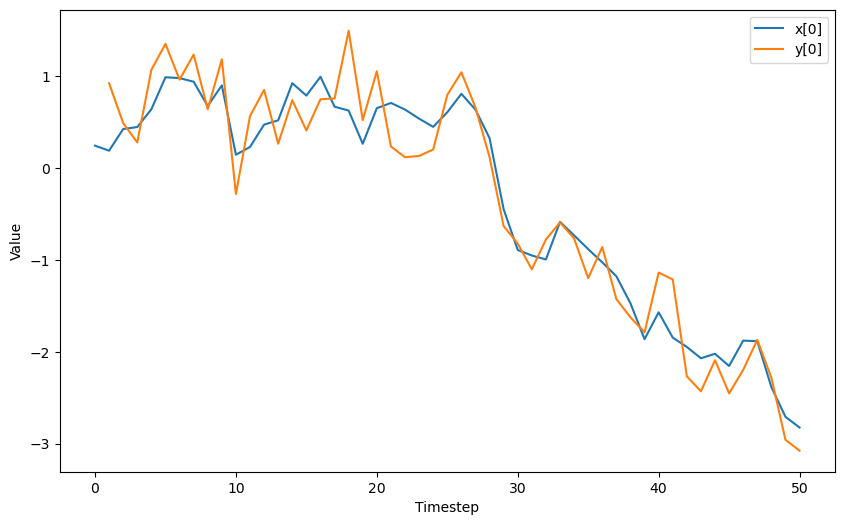

In [9]:
# Generate Data
## Set Params
A = np.array([[1.]])
H = np.array([[1.]])
Sigma_q = np.diag([0.1])
Sigma_r = np.diag([0.1])

## Generate Data
def dynamic(x_k):
    q_k = np.random.multivariate_normal(mean=np.zeros(len(x_k)), cov=Sigma_q)
    x_k_plus_1 = np.matmul(A, x_k) + q_k
    return x_k_plus_1

def measurement(x_k):
    r_k = np.random.multivariate_normal(mean=np.zeros(len(x_k)), cov=Sigma_r)
    y_k = np.matmul(H, x_k) + r_k
    return y_k

### Set Initial Value
mu_0 = np.array([0])
Sigma_p = np.diag([0.1])
x_0 = np.random.multivariate_normal(mean=mu_0, cov=Sigma_p)

X = [x_0]
Y = []

### for loop
timesteps = 50
x_k = x_0
for _ in range(timesteps):
    x_k = dynamic(x_k)
    y_k = measurement(x_k)
    X.append(x_k)
    Y.append(y_k)

plt.figure(figsize=(10, 6))
plt.plot(range(timesteps+1), [x[0] for x in X])
plt.plot(range(1, timesteps+1), [y[0] for y in Y])
plt.xlabel("Timestep")
plt.ylabel("Value")
plt.legend(["x[0]", "y[0]"])
plt.show()

### Kalman Filter
- Hyperparams:
1. F
2. Q
3. H
4. R
- Modelparams:
1. $\mu$
2. P

KF is for computing $\mu_k, P_k$ based on Hyperparameters and $\{y_k\}$

Suppose $x_0 \sim \mathcal{N}(\mu_0, P_0)$, here $\mu_0, P_0$ are known, which is inital value.

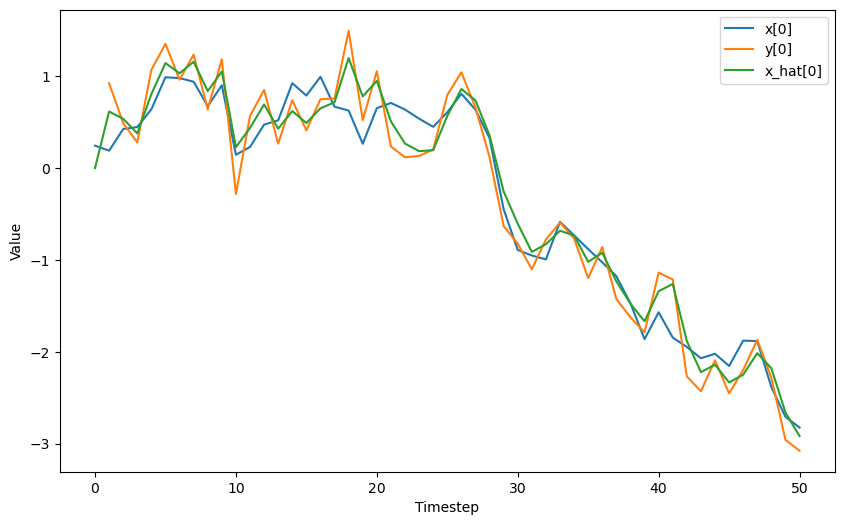

In [10]:
# KalmanFilter
## Setting KF
kf = KalmanFilter(dim_x=1, dim_z=1)

# Dynamic
kf.F = A
kf.Q = Sigma_q

# Measurement
kf.H = H
kf.R = Sigma_r

# Initial Value
kf.x = mu_0
kf.P = Sigma_p

# Note that Y is measurement matrix
X_hat = [mu_0]
for y in Y:
    # update mu and P for x
    kf.predict() 
    # update mu based on y in Y
    kf.update(y)
    # get mu|y
    X_hat.append(kf.x)

plt.figure(figsize=(10, 6))
plt.plot(range(timesteps+1), [x[0] for x in X])
plt.plot(range(1, timesteps+1), [y[0] for y in Y])
plt.plot(range(timesteps+1), [x[0] for x in X_hat])
plt.xlabel("Timestep")
plt.ylabel("Value")
plt.legend(["x[0]", "y[0]", "x_hat[0]"])
plt.show()


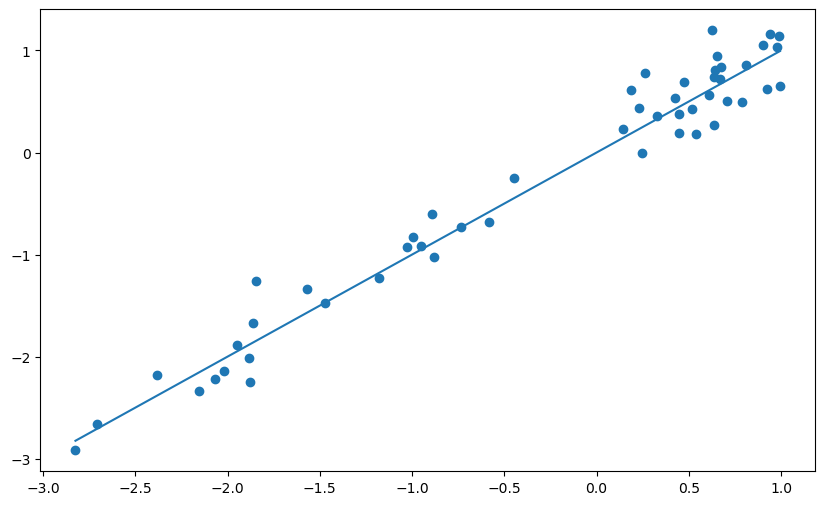

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(X, X_hat)
plt.plot(np.linspace(min(X), max(X), 100), np.linspace(min(X), max(X), 100))
plt.show()

## Case2 Linear Gaussian Model
> let $x \in \mathbb{R}^n$ and $y \in \mathbb{R}^m$.

In case2, we set $f(\cdot) = A \in \mathbb{R}^{n \times n}, h(\cdot) = H \in \mathbb{R}^{m \times n}$, which means:
$$
x_k = A * x_{k-1} + q_{k-1}, \\
y_k = H * x_k + r_k
$$